In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

BNB_TRENDS = pd.read_excel('/content/drive/MyDrive/2021-W_IAB/BNB_trends_FINAL.xlsx')
DOGE_TRENDS = pd.read_excel('/content/drive/MyDrive/2021-W_IAB/DOGE_trends_FINAL.xlsx')

BNB_TRADE = pd.read_csv('/content/drive/MyDrive/2021-W_IAB/BNBUSDT_FINAL.csv')
DOGE_TRADE = pd.read_csv('/content/drive/MyDrive/2021-W_IAB/DOGEUSDT_FINAL.csv')

In [ ]:
print(BNB_TRENDS.shape)
print(DOGE_TRENDS.shape)

(265, 2)
(264, 2)


In [ ]:
BNB_TRENDS = BNB_TRENDS.drop([0,1,2,3])
BNB_TRENDS.columns = ['date', 'trend']
BNB_TRENDS = BNB_TRENDS.set_index('date')
BNB_TRENDS['trend'] = BNB_TRENDS['trend'].apply(lambda x: int(x))


DOGE_TRENDS = DOGE_TRENDS.drop([0,1,2,3])
DOGE_TRENDS.columns = ['date', 'trend']
DOGE_TRENDS = DOGE_TRENDS.set_index('date')
DOGE_TRENDS['trend'] = DOGE_TRENDS['trend'].apply(lambda x: int(x))

BNB_TRADE = BNB_TRADE.set_index('Date')
DOGE_TRADE = DOGE_TRADE.set_index('Date')

In [ ]:
x1 = BNB_TRENDS.loc['2020-12-05':'2021-12-26', :]
x1 = list(x1['trend'])
x2 = BNB_TRADE.loc['2020-12-05':'2021-12-31', :].Volume
y = BNB_TRADE.loc['2020-12-05':'2021-12-31', :].Close

def list_chunk(lst, n):
    chunked_list = [lst[i:i+n] for i in range(0, len(lst), n)]
    return [sum(s)/len(s) for s in chunked_list]

x2 = list_chunk(x2, 7)
y = list_chunk(y, 7)

DOGE_TRENDS

,trend
date,
2017-01-15,0
2017-01-22,0
2017-01-29,0
2017-02-05,0
2017-02-12,0
...,...
2021-12-05,10
2021-12-12,17
2021-12-19,13


In [ ]:
x1 = list(np.diff(x1))
x2 = list(np.diff(x2))
y = list(np.diff(y))

In [ ]:
x1_size = np.linalg.norm(x1)
x2_size = np.linalg.norm(x2)
y_size = np.linalg.norm(y)

x1_norm = x1 / x1_size
x2_norm = x2 / x2_size
y_norm = y / y_size

x2_norm

plt.scatter(x2_norm, y_norm) 
fit = np.polyfit(x1_norm, y_norm, deg=4) 
p = np.poly1d(fit) 
plt.plot(x1_norm,p(x1_norm),"r--") 
plt.show()

# 상관계수의 검정
# 상관계수, p-value가 반환됨
import scipy.stats as stats
stats.pearsonr(x1_norm, y_norm) # p-value가 0에 매우 가까운 값이 나와서 상관관계가 없다는 귀무가설을 기각할 수 있음

stats.pearsonr(x2_norm, y_norm) # p-value가 0에 매우 가까운 값이 나와서 상관관계가 없다는 귀무가설을 기각할 수 있음



(0.5194455936482808, 4.827939878767347e-05)

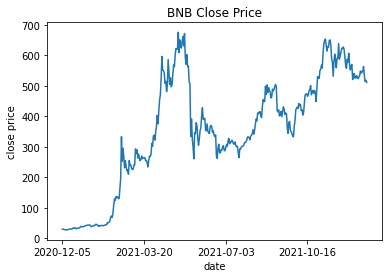

In [ ]:
x0 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].index)
y0 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].Close)

plt.plot(x0, y0)
plt.title("BNB Close Price")
plt.xlabel("date")
plt.ylabel("close price")

plt.xticks(x0[::105])
plt.show()

# x0 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].index)
# y0 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].Close)

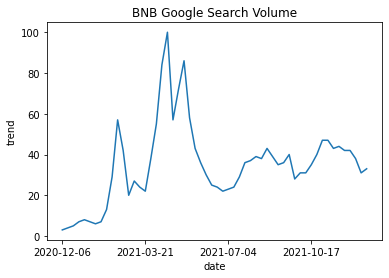

In [ ]:
x1 = list(BNB_TRENDS.loc['2020-12-05':'2021-12-31', :].index)
y1 = list(BNB_TRENDS.loc['2020-12-05':'2021-12-31', :].trend)

plt.plot(x1, y1)
plt.title("BNB Google Search Volume")
plt.xlabel("date")
plt.ylabel("trend")

plt.xticks(x1[::15])
plt.show()

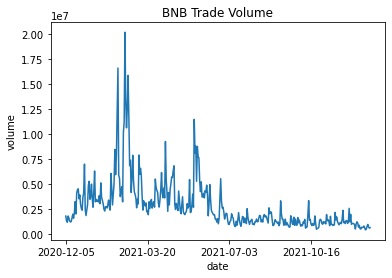

In [ ]:
x2 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].index)
y2 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].Volume)

plt.plot(x2, y2)
plt.title("BNB Trade Volume")
plt.xlabel("date")
plt.ylabel("volume")

plt.xticks(x2[::105])
plt.show()

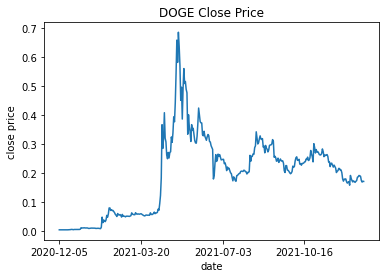

In [ ]:
x3 = list(DOGE_TRADE.loc['2020-12-05':'2021-12-31', :].index)
y3 = list(DOGE_TRADE.loc['2020-12-05':'2021-12-31', :].Close)

plt.plot(x3, y3)
plt.title("DOGE Close Price")
plt.xlabel("date")
plt.ylabel("close price")

plt.xticks(x3[::105])
plt.show()

# x0 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].index)
# y0 = list(BNB_TRADE.loc['2020-12-05':'2021-12-31', :].Close)

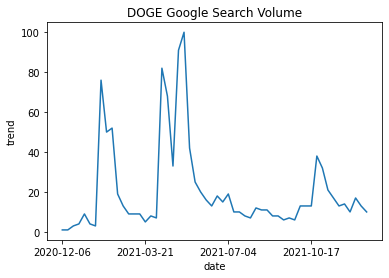

In [ ]:
x4 = list(DOGE_TRENDS.loc['2020-12-05':'2021-12-31', :].index)
y4 = list(DOGE_TRENDS.loc['2020-12-05':'2021-12-31', :].trend)

plt.plot(x4, y4)
plt.title("DOGE Google Search Volume")
plt.xlabel("date")
plt.ylabel("trend")

plt.xticks(x4[::15])
plt.show()

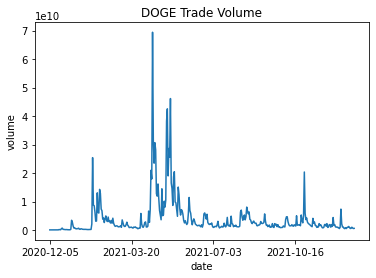

In [ ]:
x5 = list(DOGE_TRADE.loc['2020-12-05':'2021-12-31', :].index)
y5 = list(DOGE_TRADE.loc['2020-12-05':'2021-12-31', :].Volume)

plt.plot(x5, y5)
plt.title("DOGE Trade Volume")
plt.xlabel("date")
plt.ylabel("volume")

plt.xticks(x5[::105])
plt.show()